# 📉 Principal Component Regression (PCR)

## 🧠 What is Principal Component Regression?

**Principal Component Regression (PCR)** is a technique that combines:
1. **Principal Component Analysis (PCA)** — to reduce dimensionality and remove multicollinearity
2. **Linear Regression** — fitted on the selected principal components

---

### 🧾 Why Use PCR?

- Handles **high-dimensional** or **multicollinear** data well
- Reduces overfitting by projecting onto lower-dimensional space
- Improves model interpretability

---

### 📐 Steps in PCR

1. Standardize the predictors
2. Apply PCA to get principal components
3. Choose top \( k \) components (e.g., via explained variance)
4. Fit a linear regression on those components


R^2: 0.9579741412688205
MSE: 0.017981363486129654


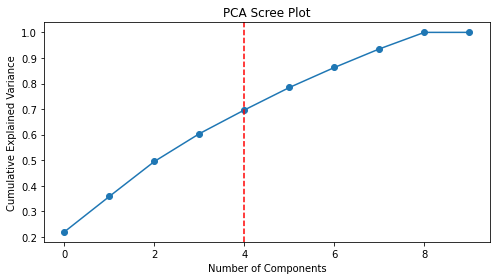

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Simulate multicollinear data
np.random.seed(0)
n_samples, n_features = 100, 10
X = np.random.rand(n_samples, n_features)
X[:, 1] = X[:, 0] + np.random.normal(0, 0.01, size=n_samples)  # induce multicollinearity
beta = np.array([1, 1] + [0]*(n_features - 2))
y = X @ beta + np.random.normal(0, 0.1, size=n_samples)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Choose number of components
n_components = 5
X_pca_subset = X_pca[:, :n_components]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_subset, y, test_size=0.2, random_state=0)

# Fit regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluate
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot explained variance
plt.figure(figsize=(7, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.tight_layout()
plt.show()


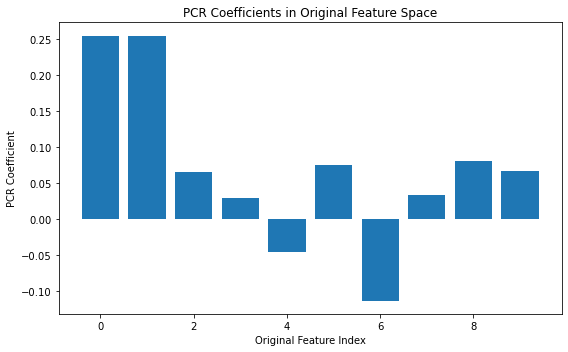

In [11]:
beta_pcr_original = pcr_model.coef_ @ pca.components_[:n_components, :]

# Plot coefficients
plt.figure(figsize=(8, 5))
plt.bar(range(len(beta_pcr_original)), beta_pcr_original)
plt.xlabel("Original Feature Index")
plt.ylabel("PCR Coefficient")
plt.title("PCR Coefficients in Original Feature Space")
plt.tight_layout()
plt.show()

PCR:
  R² = 0.4418
  MSE = 0.3884

OLS:
  R² = 0.2499
  MSE = 0.5219

Ridge:
  R² = 0.4080
  MSE = 0.4119



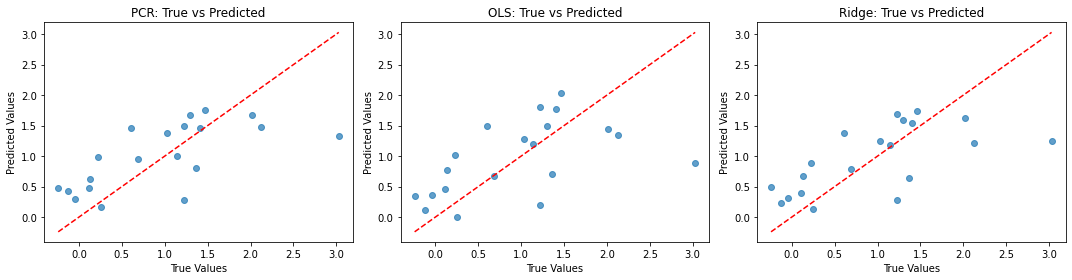

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Simulate multicollinear data
np.random.seed(0)
n_samples, n_features = 100, 10
X = np.random.rand(n_samples, n_features)
X[:, 1] = X[:, 0] + np.random.normal(0, 0.01, size=n_samples)  # add multicollinearity
true_beta = np.array([1, 1] + [0] * (n_features - 2))
y = X @ true_beta + np.random.normal(0, 0.6, size=n_samples)

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: PCR
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
n_components = 7
X_train_pcr = X_train_pca[:, :n_components]
X_test_pcr = X_test_pca[:, :n_components]

pcr_model = LinearRegression()
pcr_model.fit(X_train_pcr, y_train)
y_pred_pcr = pcr_model.predict(X_test_pcr)

# Step 4: OLS (plain linear regression)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

# Step 5: Ridge regression
ridge_model = Ridge(alpha=1.0, solver='sparse_cg')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Evaluation
def report(name, y_true, y_pred):
    print(f"{name}:")
    print(f"  R² = {r2_score(y_true, y_pred):.4f}")
    print(f"  MSE = {mean_squared_error(y_true, y_pred):.4f}")
    print("")

report("PCR", y_test, y_pred_pcr)
report("OLS", y_test, y_pred_ols)
report("Ridge", y_test, y_pred_ridge)

# Step 7: Plot predicted vs. true values
plt.figure(figsize=(15, 4))

methods = [("PCR", y_pred_pcr), ("OLS", y_pred_ols), ("Ridge", y_pred_ridge)]

for i, (name, y_pred) in enumerate(methods, 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name}: True vs Predicted")

plt.tight_layout()
plt.show()


R^2 (real): 0.5009029414048369
MSE (real): 0.6546610418078956


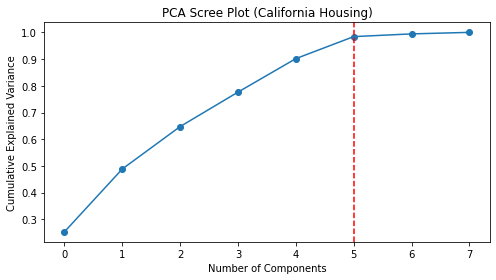

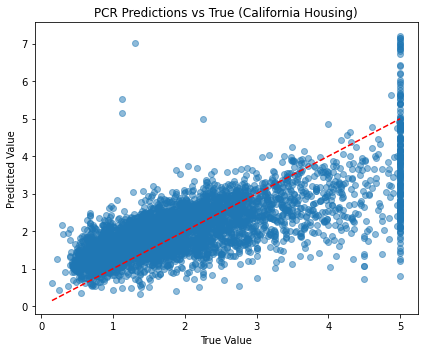

In [22]:
from sklearn.datasets import fetch_california_housing

# Load and standardize
data = fetch_california_housing()
X_real = data.data
y_real = data.target
scaler = StandardScaler()
X_scaled_real = scaler.fit_transform(X_real)

# PCA
pca_real = PCA()
X_pca_real = pca_real.fit_transform(X_scaled_real)

# Choose top components
n_components = 6
X_pca_real_subset = X_pca_real[:, :n_components]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_real_subset, y_real, test_size=0.2, random_state=1)

# Regression
reg_real = LinearRegression(fit_intercept=True)
reg_real.fit(X_train, y_train)
y_pred_real = reg_real.predict(X_test)

# Evaluate
print("R^2 (real):", r2_score(y_test, y_pred_real))
print("MSE (real):", mean_squared_error(y_test, y_pred_real))

# Scree plot
plt.figure(figsize=(7, 4))
plt.plot(np.cumsum(pca_real.explained_variance_ratio_), marker='o')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot (California Housing)")
plt.tight_layout()
plt.show()

# Predicted vs true
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_real, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("PCR Predictions vs True (California Housing)")
plt.tight_layout()
plt.show()


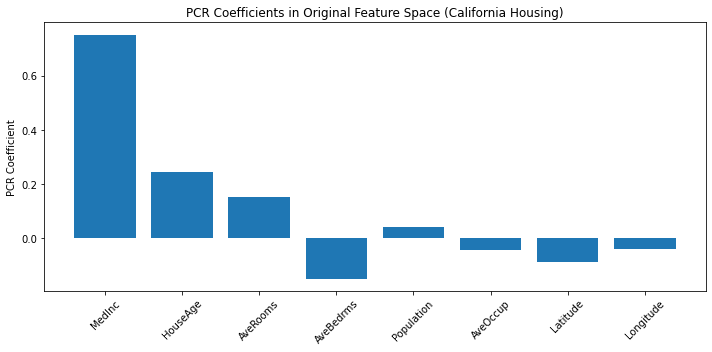

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Feature names
feature_names = fetch_california_housing().feature_names

# FIX: Adjust for intercept if needed
# beta_pcr_original = reg_real.coef_ @ pca_real.components_[:n_components, :]   # Only if fit_intercept=False
beta_pc = reg_real.coef_[:n_components]
#beta_pcr_original = beta_pc @ pca_real.components_[:n_components, :]
beta_pcr_original = reg_real.coef_[:n_components] @ pca_real.components_[:n_components, :]  # Default case

# Plot
plt.figure(figsize=(10, 5))
plt.bar(feature_names, beta_pcr_original)
plt.xticks(rotation=45)
plt.ylabel("PCR Coefficient")
plt.title("PCR Coefficients in Original Feature Space (California Housing)")
plt.tight_layout()
plt.show()

